# Exploring Text
In this lesson, we'll be taking a look at a data set that contains SMS messages that are labelled as either a spam text message, or a valid, a.k.a. text message

In [1]:
import pandas as pd
# Use first two columns only to eliminate NaNs from columns 2, 3, 4
df = pd.read_csv('spam.csv', encoding='latin-1', usecols=[0,1])
df.columns = ['label', 'text']
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [2]:
labels = pd.concat([df.label.value_counts(),
                    df.label.value_counts(normalize=True)], axis=1)
labels.columns = ['n', 'percent']
labels

,n,percent
ham,4825,0.865937
spam,747,0.134063


________________________

Clean the text (see [data prep lesson](https://ds.codeup.com/nlp/prepare/#removing-accented-characters)) and create 3 sets of words: 

- The words that appear in legitimate text messages.
- The words that appear in spam text messages.
- All of the words.

In [3]:
import unicodedata
import re
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords
import pandas as pd

def basic_clean(text):
    text = unicodedata.normalize('NFKD', text.lower())\
        .encode('ascii', 'ignore')\
        .decode('utf-8', 'ignore')
    return re.sub(r"[^a-z0-9\s]", '', text)

In [4]:
df['text_cleaned'] = df.text.apply(basic_clean)
df.head()

,label,text,text_cleaned
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...


In [5]:
def tokenize(string):
    '''
    This function takes in a string and
    returns a tokenized string.
    '''
    # Create tokenizer.
    tokenizer = nltk.tokenize.ToktokTokenizer()
    
    # Use tokenizer
    string = tokenizer.tokenize(string, return_str=True)
    
    return string

In [6]:
df['text_tokenized'] = df.text_cleaned.apply(tokenize)
df.head()

,label,text,text_cleaned,text_tokenized
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,go until jurong point crazy available only in ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,u dun say so early hor u c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...,nah i dont think he goes to usf he lives aroun...


In [7]:
def lemmatize(string):
    '''
    This function takes in string for and
    returns a string with words lemmatized.
    '''
    # Create the lemmatizer.
    wnl = nltk.stem.WordNetLemmatizer()
    
    # Use the lemmatizer on each word in the list of words we created by using split.
    lemmas = [wnl.lemmatize(word) for word in string.split()]
    
    # Join our list of words into a string again and assign to a variable.
    string = ' '.join(lemmas)
    
    return string

In [8]:
df['text_lemmatized'] = df.text_tokenized.apply(lemmatize)
df.head()

,label,text,text_cleaned,text_tokenized,text_lemmatized
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,go until jurong point crazy available only in ...,go until jurong point crazy available only in ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,u dun say so early hor u c already then say,u dun say so early hor u c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...,nah i dont think he goes to usf he lives aroun...,nah i dont think he go to usf he life around h...


In [10]:
def remove_stopwords(string, extra_words=[], exclude_words=[]):
    '''
    This function takes in a string, optional extra_words and exclude_words parameters
    with default empty lists and returns a string.
    '''
    # Create stopword_list.
    stopword_list = stopwords.words('english')
    
    # Remove 'exclude_words' from stopword_list to keep these in my text.
    stopword_list = set(stopword_list) - set(exclude_words)

    # Add in 'extra_words' to stopword_list.
    stopword_list = stopword_list.union(set(extra_words))
    
    # Split words in string.
    words = string.split()
    
    # Create a list of words from my string with stopwords removed and assign to variable.
    filtered_words = [word for word in words if word not in stopword_list]
    
    # Join words in the list back into strings and assign to a variable.
    string_without_stopwords = ' '.join(filtered_words)
    
    return string_without_stopwords

In [11]:
df['text_filtered'] = df.text_lemmatized.apply(remove_stopwords)
df.head()

,label,text,text_cleaned,text_tokenized,text_lemmatized,text_filtered
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,go until jurong point crazy available only in ...,go until jurong point crazy available only in ...,go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,u dun say so early hor u c already then say,u dun say so early hor u c already then say,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...,nah i dont think he goes to usf he lives aroun...,nah i dont think he go to usf he life around h...,nah dont think go usf life around though


Add a column with list of words:

In [25]:
# Remove non-alphanumeric characters (and spaces) OR (|) single character words (space, character, space)
re.sub(r'([^a-z0-9\s]|\s.\s)', '', df.text_filtered[0])

'go jurong point crazy available bugisgreat world labuffet cine got amore wat'

In [15]:
re.sub(r'([^a-z0-9\s]|\s.\s)', '', df.text_filtered[0]).split()

['go',
 'jurong',
 'point',
 'crazy',
 'available',
 'bugisgreat',
 'world',
 'labuffet',
 'cine',
 'got',
 'amore',
 'wat']

In [21]:
words = [re.sub(r'([^a-z0-9\s]|\s.\s)', '', doc).split() for doc in df.text_filtered]
words

[['go',
  'jurong',
  'point',
  'crazy',
  'available',
  'bugisgreat',
  'world',
  'labuffet',
  'cine',
  'got',
  'amore',
  'wat'],
 ['ok', 'lar', 'joking', 'wifoni'],
 ['free',
  'entrywkly',
  'comp',
  'win',
  'fa',
  'cup',
  'final',
  'tkts',
  '21st',
  'may',
  '2005',
  'text',
  'fa',
  '87121',
  'receive',
  'entry',
  'questionstd',
  'txt',
  'ratetcs',
  'apply',
  '08452810075over18s'],
 ['u', 'dun', 'say', 'early', 'horc', 'already', 'say'],
 ['nah', 'dont', 'think', 'go', 'usf', 'life', 'around', 'though'],
 ['freemsg',
  'hey',
  'darlingweek',
  'word',
  'back',
  'id',
  'like',
  'fun',
  'still',
  'tb',
  'ok',
  'xxx',
  'std',
  'chgs',
  'send',
  'i12150',
  'rcv'],
 ['even', 'brother', 'like', 'speak', 'treat', 'like', 'aid', 'patent'],
 ['per',
  'request',
  'melle',
  'melle',
  'oru',
  'minnaminunginte',
  'nurungu',
  'vettam',
  'ha',
  'set',
  'callertune',
  'caller',
  'presscopy',
  'friend',
  'callertune'],
 ['winner',
  'valued',
  'n

In [22]:
df = pd.concat([df, pd.DataFrame({'words': words})], axis = 1)
df

,label,text,text_cleaned,text_tokenized,text_lemmatized,text_filtered,words
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,go until jurong point crazy available only in ...,go until jurong point crazy available only in ...,go jurong point crazy available bugis n great ...,"[go, jurong, point, crazy, available, bugisgre..."
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif u oni,"[ok, lar, joking, wifoni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry 2 wkly comp win fa cup final tkts 2...,"[free, entrywkly, comp, win, fa, cup, final, t..."
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,u dun say so early hor u c already then say,u dun say so early hor u c already then say,u dun say early hor u c already say,"[u, dun, say, early, horc, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...,nah i dont think he goes to usf he lives aroun...,nah i dont think he go to usf he life around h...,nah dont think go usf life around though,"[nah, dont, think, go, usf, life, around, though]"
...,...,...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,this is the 2nd time we have tried 2 contact u...,this is the 2nd time we have tried 2 contact u...,this is the 2nd time we have tried 2 contact u...,2nd time tried 2 contact u u i12750 pound priz...,"[2nd, time, triedcontactu, i12750, pound, priz..."
5568,ham,Will ï¿½_ b going to esplanade fr home?,will i12 b going to esplanade fr home,will i12 b going to esplanade fr home,will i12 b going to esplanade fr home,i12 b going esplanade fr home,"[i12going, esplanade, fr, home]"
5569,ham,"Pity, * was in mood for that. So...any other s...",pity was in mood for that soany other suggest...,pity was in mood for that soany other suggestions,pity wa in mood for that soany other suggestion,pity wa mood soany suggestion,"[pity, wa, mood, soany, suggestion]"
5570,ham,The guy did some bitching but I acted like i'd...,the guy did some bitching but i acted like id ...,the guy did some bitching but i acted like id ...,the guy did some bitching but i acted like id ...,guy bitching acted like id interested buying s...,"[guy, bitching, acted, like, id, interested, b..."


In [24]:
for i in range(len(df.text_filtered)):
    print(re.sub(r'([^a-z0-9\s]|\s.\s)', '', df.text_filtered[i]).split())

['go', 'jurong', 'point', 'crazy', 'available', 'bugisgreat', 'world', 'labuffet', 'cine', 'got', 'amore', 'wat']
['ok', 'lar', 'joking', 'wifoni']
['free', 'entrywkly', 'comp', 'win', 'fa', 'cup', 'final', 'tkts', '21st', 'may', '2005', 'text', 'fa', '87121', 'receive', 'entry', 'questionstd', 'txt', 'ratetcs', 'apply', '08452810075over18s']
['u', 'dun', 'say', 'early', 'horc', 'already', 'say']
['nah', 'dont', 'think', 'go', 'usf', 'life', 'around', 'though']
['freemsg', 'hey', 'darlingweek', 'word', 'back', 'id', 'like', 'fun', 'still', 'tb', 'ok', 'xxx', 'std', 'chgs', 'send', 'i12150', 'rcv']
['even', 'brother', 'like', 'speak', 'treat', 'like', 'aid', 'patent']
['per', 'request', 'melle', 'melle', 'oru', 'minnaminunginte', 'nurungu', 'vettam', 'ha', 'set', 'callertune', 'caller', 'presscopy', 'friend', 'callertune']
['winner', 'valued', 'network', 'customer', 'selected', 'receivea', 'i12900', 'prize', 'reward', 'claim', 'call', '09061701461', 'claim', 'code', 'kl341', 'valid', '1

['correct', 'wa', 'work', 'today']
['sent', 'scream', 'moan', 'bed', 'princess']
['wake', 'long', 'ago', 'already', 'dunno', 'thing']
['oh', 'getting', 'evenu']
['thk', '50', 'shd', 'ok', 'said', 'plus', 'minus', '10', 'i12', 'leave', 'line', 'paragraph']
['call', 'plz', 'number', 'show', 'coveragd', 'area', 'urgnt', 'call', 'vasai', 'amp', 'reach', '4o', 'clock', 'call', 'plz']
['yeah', 'jay', 'sort', 'fucking', 'retard']
['sorry', 'wa', 'bathroom', 'sup']
['ur', 'balance', 'i12500', 'ur', 'next', 'question', 'sang', 'uptown', 'girl', '80answer', 'txt', 'ur', 'answer', '83600', 'good', 'luck']
['exam', 'februarywish', 'great', 'day']
['dont', 'know', 'come', 'ask', 'question', 'like', 'dont', 'mistake']
['aight', 'rush', 'ill', 'ask', 'jay']
['good', 'morning', 'plz', 'call', 'sir']
['ok', 'larsleep', 'early', 'nite']
['oh', 'iciclor', 'den', 'meet', 'day']
['oh', 'half', 'hour', 'much', 'longer', 'syria', 'canada', 'eh', 'wow', 'must', 'get', 'much', 'work', 'done', 'dayextra', 'time

['way', 'office', 'da']
['place', 'want', 'da']
['pain', 'couldnt', 'come', 'worse', 'time']
['ok']
['stalking', 'u']
['sorry', 'dude', 'dont', 'know', 'forgot', 'even', 'dan', 'reminded', 'sorry', 'hope', 'guy', 'fun']
['ok', 'lor']
['apps', 'class', 'varaya', 'elaya']
['xmas', 'story', 'peace', 'xmas', 'msg', 'love', 'xmas', 'miracle', 'jesus', 'hav', 'blessed', 'month', 'ahead', 'amp', 'wishmerry', 'xmas']
['urgent', 'mobile', 'number', 'i122000', 'bonus', 'caller', 'prize', '100603', '2nd', 'attempt', 'reach', 'call', '09066368753', 'asap', 'box', '97n7qp', '150ppm']
['day', 'asked', 'anand', 'number']
['surfing', 'online', 'store', 'offer', 'want', 'buy', 'thing']
['long', 'beach', 'lor', 'expecteddinner']
['home', 'way']
['fine', 'thanks']
['happen', 'tell', 'truth']
['like', 'italian', 'food']
['weird', 'know', 'one', 'point']
['aww', 'must', 'nearly', 'deadwell', 'jez', 'iscoming', 'todo', 'workand', 'whilltake', 'forever']
['tell', 'friend', 'plan', 'valentine', 'day', 'lturlg

['u', 'go', 'back', 'urself', 'lor']
['gas', 'station', 'go']
['kbored', 'come', 'home']
['babe', 'love', 'cover', 'face', 'kiss']
['like', 'made', 'throw', 'smoking', 'friend', 'car', 'one', 'time', 'wa', 'awesome']
['still', 'checked', 'da']
['go', 'walmart', 'ill', 'stay']
['havent', 'forgotten', 'might', 'couple', 'buck', 'send', 'tomorrowlove', 'ya']
['oh', 'great', 'ill', 'disturb', 'talk']
['reverse', 'cheating', 'mathematics']
['ure', 'welcome', 'caughtusing', 'broken', 'english']
['problem', 'baby', 'good', 'time', 'talk', 'called', 'left', 'message']
['sorry', 'ill', 'call', 'later']
['oh', 'brand']
['sorry', 'cant', 'take', 'call', 'right', 'happens2waxsto', 'wat', 'want', 'come', 'ill', 'get', 'medical', 'insurance', 'shell', 'able', 'deliver', 'basic', 'care', 'im', 'currently', 'shopping', 'right', 'medical', 'insurance', 'give', 'til', 'friday', 'morning', 'thats', 'ill', 'see', 'major', 'person', 'guide', 'right', 'insurance']
['time', 'coming']
['call', 'say', 'coming'

['si', 'take', 'mokka', 'player']
['still', 'playing', 'gautham']
['hey', 'mr', 'going', 'sea', 'view', 'couple', 'gay', 'mean', 'game', 'give', 'bell', 'ya', 'finish']
['k', 'jason', 'say', 'gonna', 'around', 'ill', 'around', 'ltgt']
['sorry', 'able', 'get', 'see', 'morning']
['aight', 'well', 'keep', 'informed']
['number', 'sir']
['searching', 'good', 'dual', 'sim', 'mobile', 'pa']
['seems', 'unnecessarily', 'hostile']
['dude', 'got', 'haircut', 'breezy']
['congratsmobile', '3g', 'videophonescall', '09061744553', 'videochat', 'wid', 'ur', 'mate', 'play', 'java', 'game', 'dload', 'polyh', 'music', 'noline', 'rentl', 'bx420', 'ip4', '5we', '150pm']
['1appledayno', 'doctor', '1tulsi', 'leafdayno', 'cancer', '1lemondayno', 'fat', '1cup', 'milkdayno', 'bone', 'problmslitre', 'watrdayno', 'disease', 'snd', 'thu', 'care']
['thought', 'king', 'hill', 'thing']
['nope', 'ill', 'come', 'online']
['also', 'tell', 'said', 'happy', 'birthday']
['bishan', 'lei', 'tot', 'i12', 'say', 'lavender']
['b

['hmm', 'shall', 'bring', 'bottle', 'wine', 'keepamused', 'joking', 'ill', 'still', 'bring', 'bottle', 'red', 'white', 'see', 'tomorrow']
['ur', 'face', 'test2468ltgt', 'select', 'number', 'tell', 'ur', 'face', 'astrology', 'waiting', 'quick', 'reply']
['hey', 'iouri', 'gave', 'number', 'im', 'wylie', 'ryans', 'friend']
['yep', 'get', 'program', 'youre', 'slacking']
['im', 'inside', 'officestill', 'filling', 'formsdon', 'know', 'leave']
['think', 'mentor', '100', 'percent', 'sure']
['call', '09095350301', 'send', 'girl', 'erotic', 'ecstacy', '60pmin', 'stop', 'text', 'call', '08712460324', 'nat', 'rate']
['camera', 'awarded', 'sipix', 'digital', 'camera', 'call', '09061221066', 'fromm', 'landline', 'delivery', 'within', '28', 'day']
['i12400', 'xmas', 'reward', 'waiting', 'computer', 'ha', 'randomly', 'picked', 'loyal', 'mobile', 'customer', 'receive', 'i12400', 'reward', 'call', '09066380611']
['trying', 'figure', 'im', 'suppose', 'see', 'couple', 'different', 'people', 'week', 'said'

In [23]:
def clean_more():
    words = [re.sub(r'([^a-z0-9\s]|\s.\s)', '', doc).split() for doc in df.text_filtered]
    return words

Goals for cleaning:
- Remove any common words that you're missing from the stopword list (noise that is still in your data)
- Common words that are spelled differently across the documents

Questions?
- Are there words more common in ham than in spam? Vice versa?
- Exploring n-grams, phrases -- bi-grams are 2-word phrases, tri-grams are 3-word phrases, 4-gram, ...

To finalize prep for exploration:
1. Add a feature that is the length of each document
2. Build a set of ham_words and spam_words to explore

In [27]:
ham_words = ' '.join(df[df.label == 'ham'].text_filtered)
ham_words

'go jurong point crazy available bugis n great world la e buffet cine got amore wat ok lar joking wif u oni u dun say early hor u c already say nah dont think go usf life around though even brother like speak treat like aid patent per request melle melle oru minnaminunginte nurungu vettam ha set callertune caller press 9 copy friend callertune im gonna home soon dont want talk stuff anymore tonight k ive cried enough today ive searching right word thank breather promise wont take help granted fulfil promise wonderful blessing time date sunday oh kim watching eh u remember 2 spell name yes v naughty make v wet fine thati12i12s way u feel thati12i12s way gota b seriously spell name ii12i12i12m going try 2 month ha ha joking i12 pay first lar da stock comin aft finish lunch go str lor ard 3 smth lor u finish ur lunch already ffffffffff alright way meet sooner forced eat slice im really hungry tho suck mark getting worried know im sick turn pizza lol lol always convincing catch bus frying 

In [28]:
spam_words = ' '.join(df[df.label == 'spam'].text_filtered)
spam_words

'free entry 2 wkly comp win fa cup final tkts 21st may 2005 text fa 87121 receive entry questionstd txt ratetcs apply 08452810075over18s freemsg hey darling 3 week word back id like fun still tb ok xxx std chgs send i12150 rcv winner valued network customer selected receivea i12900 prize reward claim call 09061701461 claim code kl341 valid 12 hour mobile 11 month u r entitled update latest colour mobile camera free call mobile update co free 08002986030 six chance win cash 100 20000 pound txt csh11 send 87575 cost 150pday 6days 16 tsandcs apply reply hl 4 info urgent 1 week free membership i12100000 prize jackpot txt word claim 81010 tc wwwdbuknet lccltd pobox 4403ldnw1a7rw18 xxxmobilemovieclub use credit click wap link next txt message click httpwap xxxmobilemovieclubcomnqjkgighjjgcbl england v macedonia dont miss goalsteam news txt ur national team 87077 eg england 87077 trywales scotland 4txti14120 poboxox36504w45wq 16 thanks subscription ringtone uk mobile charged i125month please 

In [35]:
all_words = ' '.join(df.text_filtered)
all_words

'go jurong point crazy available bugis n great world la e buffet cine got amore wat ok lar joking wif u oni free entry 2 wkly comp win fa cup final tkts 21st may 2005 text fa 87121 receive entry questionstd txt ratetcs apply 08452810075over18s u dun say early hor u c already say nah dont think go usf life around though freemsg hey darling 3 week word back id like fun still tb ok xxx std chgs send i12150 rcv even brother like speak treat like aid patent per request melle melle oru minnaminunginte nurungu vettam ha set callertune caller press 9 copy friend callertune winner valued network customer selected receivea i12900 prize reward claim call 09061701461 claim code kl341 valid 12 hour mobile 11 month u r entitled update latest colour mobile camera free call mobile update co free 08002986030 im gonna home soon dont want talk stuff anymore tonight k ive cried enough today six chance win cash 100 20000 pound txt csh11 send 87575 cost 150pday 6days 16 tsandcs apply reply hl 4 info urgent 

In [36]:
ham_words = re.sub(r'\s.\s', '', ham_words)
spam_words = re.sub(r'\s.\s', '', spam_words)
all_words = re.sub(r'\s.\s', '', all_words)

In [37]:
spam_words[:100]

'free entrywkly comp win fa cup final tkts 21st may 2005 text fa 87121 receive entry questionstd txt '

Once we have a list of words, we can transform it into a pandas `Series`, which we can then use to show us how often each of the words occurs.

In [31]:
ham_words.split()

['go',
 'jurong',
 'point',
 'crazy',
 'available',
 'bugisgreat',
 'world',
 'labuffet',
 'cine',
 'got',
 'amore',
 'wat',
 'ok',
 'lar',
 'joking',
 'wifonidun',
 'say',
 'early',
 'horc',
 'already',
 'say',
 'nah',
 'dont',
 'think',
 'go',
 'usf',
 'life',
 'around',
 'though',
 'even',
 'brother',
 'like',
 'speak',
 'treat',
 'like',
 'aid',
 'patent',
 'per',
 'request',
 'melle',
 'melle',
 'oru',
 'minnaminunginte',
 'nurungu',
 'vettam',
 'ha',
 'set',
 'callertune',
 'caller',
 'presscopy',
 'friend',
 'callertune',
 'im',
 'gonna',
 'home',
 'soon',
 'dont',
 'want',
 'talk',
 'stuff',
 'anymore',
 'tonightive',
 'cried',
 'enough',
 'today',
 'ive',
 'searching',
 'right',
 'word',
 'thank',
 'breather',
 'promise',
 'wont',
 'take',
 'help',
 'granted',
 'fulfil',
 'promise',
 'wonderful',
 'blessing',
 'time',
 'date',
 'sunday',
 'oh',
 'kim',
 'watching',
 'ehrememberspell',
 'name',
 'yesnaughty',
 'makewet',
 'fine',
 'thati12i12s',
 'wayfeel',
 'thati12i12s',
 'wa

In [33]:
ham_freq = pd.Series(ham_words.split()).value_counts()
ham_freq.head()

im      436
get     278
ltgt    248
ok      246
dont    237
dtype: int64

In [34]:
spam_freq = pd.Series(spam_words.split()).value_counts()
spam_freq.head()

call    342
free    191
txt     140
text    129
ur      125
dtype: int64

In [38]:
# Effectively the sum of spam_freq and ham_freq
all_freq = pd.Series(all_words.split()).value_counts()
all_freq.head()

call    552
im      450
get     351
ur      343
dont    257
dtype: int64

Now we'll combine these three together to get one resulting data frame that we can work with:

In [40]:
word_counts = (pd.concat([all_freq, ham_freq, spam_freq], axis=1, sort=True)
               .fillna(0)
               .apply(lambda s: s.astype(int)))
# sorted according to the string
# fill nas as 0 
# changed dtype to int
word_counts.head()

,0,1,2
008704050406,2,0,2
0089my,1,0,1
0121,1,0,1
01223585236,1,0,1
01223585334,2,0,2


In [41]:
word_counts = (pd.concat([all_freq, ham_freq, spam_freq], axis=1, sort=True)
               .set_axis(['all', 'ham', 'spam'], axis=1, inplace=False)
               .fillna(0)
               .apply(lambda s: s.astype(int)))
# sorted according to the string
# changed column names
# fill nas as 0 
# changed dtype to int
word_counts.head()

,all,ham,spam
008704050406,2,0,2
0089my,1,0,1
0121,1,0,1
01223585236,1,0,1
01223585334,2,0,2


We can now use this data set to answer some interesting questions:

- Are there words that should be added to the stopword list? 
- Are there words that are significantly more likely to occur in spam than in ham? 

In [43]:
word_counts.sort_values(by='all', ascending=False).head(10)

,all,ham,spam
call,552,210,342
im,450,436,13
get,351,278,73
ur,343,220,125
dont,257,237,19
ok,251,246,5
ltgt,248,248,0
go,247,219,27
free,240,49,191
know,227,214,13


In [45]:
word_counts[word_counts.spam==0].sort_values(by='ham').tail(5) # top 5 ham words that do not occur in spam

,all,ham,spam
say,107,107,0
later,119,118,0
da,121,121,0
lor,129,129,0
ltgt,248,248,0


In [47]:
word_counts[word_counts.ham==0].sort_values(by='spam').tail(10) # top 5 spam words that do not occur in ham

,all,ham,spam
ringtone,25,0,26
i122000,28,0,28
150ppm,32,0,32
i121000,33,0,33
awarded,38,0,38
18,41,0,41
guaranteed,50,0,50
tone,60,0,60
prize,82,0,82
claim,96,0,96


### Document Word Count

The length of documents is often a good feature. 

In [51]:
doc_length = [len(wordlist) for wordlist in df.words]
df.words.iloc[:10], doc_length[:10]

(0    [go, jurong, point, crazy, available, bugisgre...
 1                            [ok, lar, joking, wifoni]
 2    [free, entrywkly, comp, win, fa, cup, final, t...
 3             [u, dun, say, early, horc, already, say]
 4    [nah, dont, think, go, usf, life, around, though]
 5    [freemsg, hey, darlingweek, word, back, id, li...
 6    [even, brother, like, speak, treat, like, aid,...
 7    [per, request, melle, melle, oru, minnaminungi...
 8    [winner, valued, network, customer, selected, ...
 9    [mobile, 11, monthr, entitled, update, latest,...
 Name: words, dtype: object,
 [12, 4, 21, 7, 8, 17, 8, 15, 18, 16])

In [52]:
df['doc_length'] = doc_length
df.head()

,label,text,text_cleaned,text_tokenized,text_lemmatized,text_filtered,words,doc_length
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,go until jurong point crazy available only in ...,go until jurong point crazy available only in ...,go jurong point crazy available bugis n great ...,"[go, jurong, point, crazy, available, bugisgre...",12
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif u oni,"[ok, lar, joking, wifoni]",4
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry 2 wkly comp win fa cup final tkts 2...,"[free, entrywkly, comp, win, fa, cup, final, t...",21
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,u dun say so early hor u c already then say,u dun say so early hor u c already then say,u dun say early hor u c already say,"[u, dun, say, early, horc, already, say]",7
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...,nah i dont think he goes to usf he lives aroun...,nah i dont think he go to usf he life around h...,nah dont think go usf life around though,"[nah, dont, think, go, usf, life, around, though]",8


In [53]:
df[df.doc_length == 0]

,label,text,text_cleaned,text_tokenized,text_lemmatized,text_filtered,words,doc_length
959,ham,Where @,where,where,where,,[],0
2805,ham,Can a not?,can a not,can a not,can a not,,[],0
3374,ham,:),,,,,[],0
4573,ham,:( but your not here....,but your not here,but your not here,but your not here,,[],0
4822,ham,:-) :-),,,,,[],0


In [54]:
df = df[df.doc_length != 0]

## Visualize

In [55]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Proportion of Spam vs. Ham for the 20 most common words in our text sample')

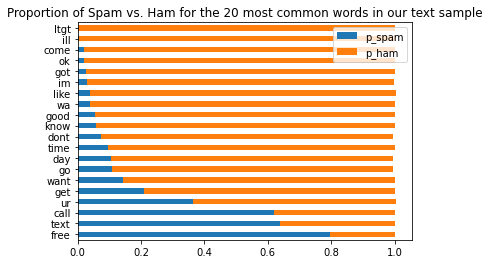

In [56]:
# Visualize the percentage of the term in ham vs. spam
# Most frequent 20 of all of them
(word_counts.assign(p_spam = word_counts.spam/word_counts['all'],
                   p_ham = word_counts.ham/word_counts['all'])
    .sort_values(by='all')[['p_spam', 'p_ham']]
    .tail(20)
    .sort_values('p_ham')
    .plot.barh(stacked=True))

plt.title('Proportion of Spam vs. Ham for the 20 most common words in our text sample')

Text(0.5, 1.0, 'Proportion of Spam vs. Ham for the 20 most common words in our text sample')

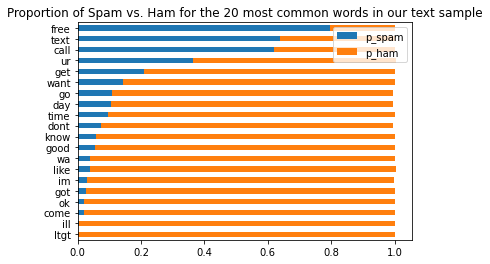

In [57]:
# Visualize the percentage of the term in ham vs. spam
# Most frequent 20 of all of them
(word_counts.assign(p_spam = word_counts.spam/word_counts['all'],
                   p_ham = word_counts.ham/word_counts['all'])
    .sort_values(by='all')[['p_spam', 'p_ham']]
    .tail(20)
    .sort_values('p_spam')
    .plot.barh(stacked=True))

plt.title('Proportion of Spam vs. Ham for the 20 most common words in our text sample')

### Word Clouds

```
python -m pip install --upgrade wordcloud
```

The wordcloud allows you to identify the relative frequency of different keywords using an easily digestible visual.

#### Common Use Cases

As a visualization technique, this method gives a more qualitative analysis of the topics in the documents.
 
#### Pros

1. It’s intuitive and easy to comprehend.
2. It helps identify overall respondent sentiment and the specific factors that drive it.
3. It provides direction for further analysis.

#### Cons

1. It fails to measure each word’s value in and of itself.
2. It allows irrelevant words to appear.
3. When words appear similar in size, it becomes difficult to differentiate them.

First we'll take a look at a simple example:

In [59]:
from wordcloud import WordCloud

In [60]:
sentence = 'Mary had a little lamb, little lamb. Its fleece was white as snow.'

(-0.5, 399.5, 199.5, -0.5)

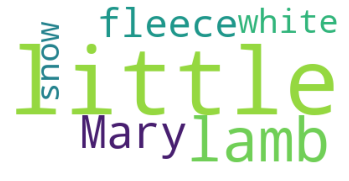

In [66]:
img = WordCloud(background_color='white').generate(sentence)
plt.imshow(img)
plt.axis('off')

In [68]:
ham_words

'go jurong point crazy available bugisgreat world labuffet cine got amore wat ok lar joking wifonidun say early horc already say nah dont think go usf life around though even brother like speak treat like aid patent per request melle melle oru minnaminunginte nurungu vettam ha set callertune caller presscopy friend callertune im gonna home soon dont want talk stuff anymore tonightive cried enough today ive searching right word thank breather promise wont take help granted fulfil promise wonderful blessing time date sunday oh kim watching ehrememberspell name yesnaughty makewet fine thati12i12s wayfeel thati12i12s way gotaseriously spell name ii12i12i12m going trymonth ha ha joking i12 pay first lar da stock comin aft finish lunch go str lor ardsmth lorfinish ur lunch already ffffffffff alright way meet sooner forced eat slice im really hungry tho suck mark getting worried know im sick turn pizza lol lol always convincing catch bus frying egg make tea eating mom left dinner feel love im

In [67]:
ham_cloud = WordCloud(background_color='pink', height=800, width=800).generate(ham_words)

spam_cloud = WordCloud(background_color = 'pink', height=800, width=800).generate(spam_words)

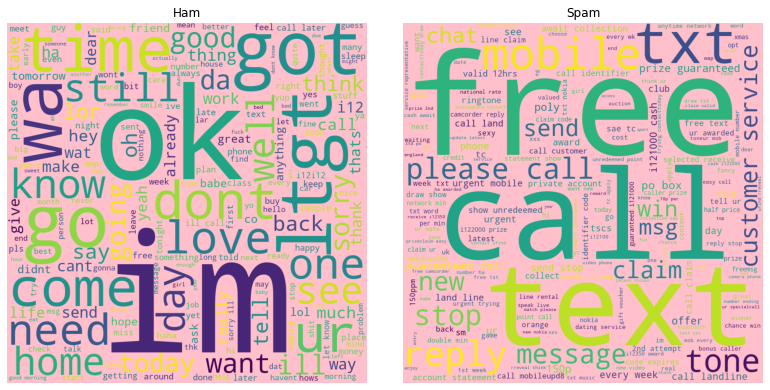

In [69]:
plt.figure(figsize=(10,10))
axs = [plt.axes([.25, 1, .5, .5]), plt.axes([.8, 1, .5, .5])]

# imshow => display data as an image
axs[0].imshow(ham_cloud)
axs[1].imshow(spam_cloud)

axs[0].set_title('Ham')
axs[1].set_title('Spam')

for ax in axs:
    ax.axis('off')

## Bigrams

Bigrams are a specific instance of the broader concept of n-grams, which is a way to combine words together. This lets us measure not just the individual word frequency, but also takes into account which words appear together.

To produce the bigrams, we'll use `nltk`.

In [75]:
sentence

'Mary had a little lamb, little lamb. Its fleece was white as snow.'

In [76]:
nltk.ngrams(sentence.split(), 2)

<generator object ngrams at 0x7faaed1a72d0>

In [77]:
list(nltk.ngrams(sentence.split(), 2))

[('Mary', 'had'),
 ('had', 'a'),
 ('a', 'little'),
 ('little', 'lamb,'),
 ('lamb,', 'little'),
 ('little', 'lamb.'),
 ('lamb.', 'Its'),
 ('Its', 'fleece'),
 ('fleece', 'was'),
 ('was', 'white'),
 ('white', 'as'),
 ('as', 'snow.')]

We can apply the same transformation to our ham data set in order to find out which bigrams are the most frequently occuring.

In [72]:
nltk.ngrams(df.text_filtered[0].split(), 2)

<generator object ngrams at 0x7faaed1a70d0>

In [74]:
list(nltk.ngrams(df.text_filtered[0].split(), 2))

[('go', 'jurong'),
 ('jurong', 'point'),
 ('point', 'crazy'),
 ('crazy', 'available'),
 ('available', 'bugis'),
 ('bugis', 'n'),
 ('n', 'great'),
 ('great', 'world'),
 ('world', 'la'),
 ('la', 'e'),
 ('e', 'buffet'),
 ('buffet', 'cine'),
 ('cine', 'got'),
 ('got', 'amore'),
 ('amore', 'wat')]

In [101]:
[list(nltk.ngrams(df.text_filtered[0].split(), 2)) for wordlist in df.words]

[[('go', 'jurong'),
  ('jurong', 'point'),
  ('point', 'crazy'),
  ('crazy', 'available'),
  ('available', 'bugis'),
  ('bugis', 'n'),
  ('n', 'great'),
  ('great', 'world'),
  ('world', 'la'),
  ('la', 'e'),
  ('e', 'buffet'),
  ('buffet', 'cine'),
  ('cine', 'got'),
  ('got', 'amore'),
  ('amore', 'wat')],
 [('go', 'jurong'),
  ('jurong', 'point'),
  ('point', 'crazy'),
  ('crazy', 'available'),
  ('available', 'bugis'),
  ('bugis', 'n'),
  ('n', 'great'),
  ('great', 'world'),
  ('world', 'la'),
  ('la', 'e'),
  ('e', 'buffet'),
  ('buffet', 'cine'),
  ('cine', 'got'),
  ('got', 'amore'),
  ('amore', 'wat')],
 [('go', 'jurong'),
  ('jurong', 'point'),
  ('point', 'crazy'),
  ('crazy', 'available'),
  ('available', 'bugis'),
  ('bugis', 'n'),
  ('n', 'great'),
  ('great', 'world'),
  ('world', 'la'),
  ('la', 'e'),
  ('e', 'buffet'),
  ('buffet', 'cine'),
  ('cine', 'got'),
  ('got', 'amore'),
  ('amore', 'wat')],
 [('go', 'jurong'),
  ('jurong', 'point'),
  ('point', 'crazy'),
  ('c

In [99]:
df['bigrams'] = [list(nltk.ngrams(wordlist, 2)) for wordlist in df.words]
df.head()

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,label,text,text_cleaned,text_tokenized,text_lemmatized,text_filtered,words,doc_length,bigrams
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,go until jurong point crazy available only in ...,go until jurong point crazy available only in ...,go jurong point crazy available bugis n great ...,"[go, jurong, point, crazy, available, bugisgre...",12,"[(go, jurong), (jurong, point), (point, crazy)..."
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif u oni,"[ok, lar, joking, wifoni]",4,"[(ok, lar), (lar, joking), (joking, wifoni)]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry 2 wkly comp win fa cup final tkts 2...,"[free, entrywkly, comp, win, fa, cup, final, t...",21,"[(free, entrywkly), (entrywkly, comp), (comp, ..."
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,u dun say so early hor u c already then say,u dun say so early hor u c already then say,u dun say early hor u c already say,"[u, dun, say, early, horc, already, say]",7,"[(u, dun), (dun, say), (say, early), (early, h..."
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...,nah i dont think he goes to usf he lives aroun...,nah i dont think he go to usf he life around h...,nah dont think go usf life around though,"[nah, dont, think, go, usf, life, around, though]",8,"[(nah, dont), (dont, think), (think, go), (go,..."


In [83]:
ham_bigrams = pd.Series(list(nltk.ngrams(ham_words.split(), 2))).value_counts().head(20)
ham_bigrams

(call, later)      47
(ill, call)        45
(let, know)        41
(sorry, ill)       39
(good, morning)    31
(dont, know)       31
(new, year)        26
(pls, send)        22
(take, care)       21
(im, going)        20
(ok, lor)          20
(im, gonna)        19
(good, night)      19
(ltgt, min)        19
(hi, hi)           18
(last, night)      18
(great, day)       17
(happy, new)       15
(like, ltgt)       14
(send, message)    14
dtype: int64

In [85]:
spam_bigrams = pd.Series(list(nltk.ngrams(spam_words.split(), 2))).value_counts().head(20)
spam_bigrams

(please, call)          43
(customer, service)     27
(po, box)               23
(guaranteed, call)      23
(prize, guaranteed)     22
(i121000, cash)         20
(send, stop)            19
(every, week)           19
(land, line)            18
(urgent, mobile)        18
(await, collection)     18
(valid, 12hrs)          17
(claim, call)           16
(sae, tc)               16
(account, statement)    16
(identifier, code)      15
(call, 08000930705)     15
(reply, call)           15
(selected, receive)     15
(call, mobileupd8)      15
dtype: int64

Text(0.5, 0, 'Frequency')

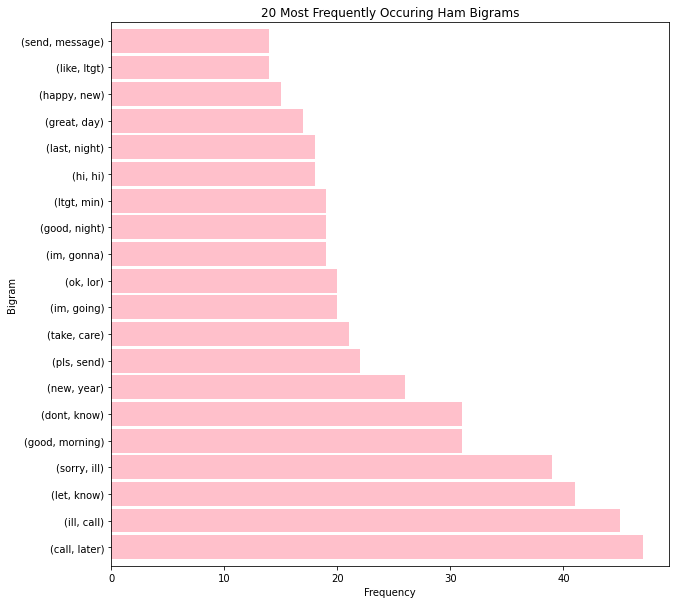

In [86]:
ham_bigrams.plot.barh(color='pink', width=.9, figsize=(10,10))
plt.title('20 Most Frequently Occuring Ham Bigrams')
plt.ylabel('Bigram')
plt.xlabel('Frequency')

Text(0.5, 0, 'Frequency')

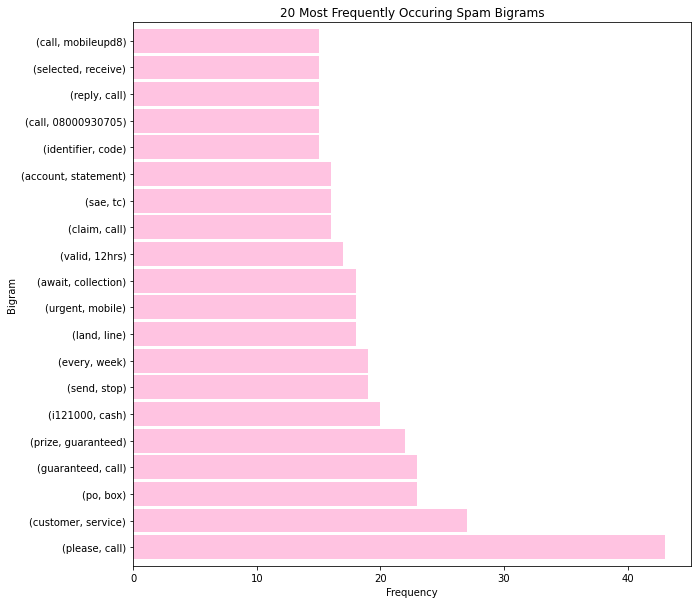

In [93]:
spam_bigrams.plot.barh(color='hotpink', width=.9, figsize=(10,10), alpha=.4)
plt.title('20 Most Frequently Occuring Spam Bigrams')
plt.ylabel('Bigram')
plt.xlabel('Frequency')

We can use these bigrams to make a word cloud as well, with a little more effort.

In [94]:
# We can supply our own values to be used to determine how big the words (or
# phrases) should be through the `generate_from_frequencies` method. The
# supplied values must be in the form of a dictionary where the keys are the
# words (phrases), and the values are numbers that correspond to the sizes.
#
# We'll convert our series to a dictionary, and convert the tuples that make up
# the index into a single string that holds each phrase.

data = {k[0] + ' ' + k[1]: v for k, v, in spam_bigrams.to_dict().items()}
data

{'please call': 43,
 'customer service': 27,
 'po box': 23,
 'guaranteed call': 23,
 'prize guaranteed': 22,
 'i121000 cash': 20,
 'send stop': 19,
 'every week': 19,
 'land line': 18,
 'urgent mobile': 18,
 'await collection': 18,
 'valid 12hrs': 17,
 'claim call': 16,
 'sae tc': 16,
 'account statement': 16,
 'identifier code': 15,
 'call 08000930705': 15,
 'reply call': 15,
 'selected receive': 15,
 'call mobileupd8': 15}

(-0.5, 799.5, 399.5, -0.5)

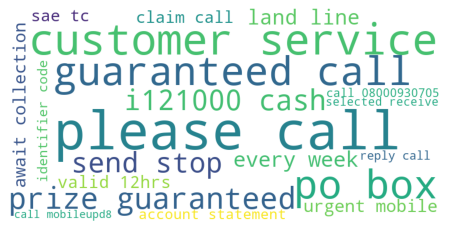

In [96]:
img = WordCloud(background_color = 'white', width = 800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8,4))
plt.imshow(img)
plt.axis('off')

In [97]:
h_data = {k[0] + ' ' + k[1]: v for k, v, in ham_bigrams.to_dict().items()}
h_data

{'call later': 47,
 'ill call': 45,
 'let know': 41,
 'sorry ill': 39,
 'good morning': 31,
 'dont know': 31,
 'new year': 26,
 'pls send': 22,
 'take care': 21,
 'im going': 20,
 'ok lor': 20,
 'im gonna': 19,
 'good night': 19,
 'ltgt min': 19,
 'hi hi': 18,
 'last night': 18,
 'great day': 17,
 'happy new': 15,
 'like ltgt': 14,
 'send message': 14}

(-0.5, 799.5, 399.5, -0.5)

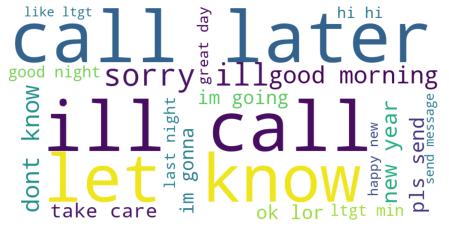

In [98]:
img = WordCloud(background_color = 'white', width = 800, height=400).generate_from_frequencies(h_data)
plt.figure(figsize=(8,4))
plt.imshow(img)
plt.axis('off')

## Exercises

Do your work for this exercise in a file named `explore`.

1. Spam Data

    1. Load the spam data set.
    1. Create and explore bigrams for the spam data. Visualize them with a word
       cloud. How do they compare with the ham bigrams?
    1. Is there any overlap in the bigrams for the spam data and the ham data?
    1. Create and explore with trigrams (i.e. a n-gram with an n of 3) for both
       the spam and ham data.
    1. Bonus: plot document length information of spam vs. ham. Does there appear to be a difference?

1. Explore the blog articles using the techniques discussed in the exploration
   lesson.

1. Explore the news articles using the techniques discussed in the exploration
   lesson. Use the `category` variable when exploring.


## Feature Extraction

1. Word count: how many words appear in each document
2. Term Frequency (TF): How often a word appears in a document.
3. Inverse Document Frequency (IDF): How much information a word provides, based on how commonly a word appears across multiple documents. The more frequently a word appears, the lower the IDF for that word will be. $$
\mbox{idf}(\mbox{word})
=
\log\left(\frac{\mbox{# of documents}}{\mbox{# of documents containing the word}}\right)
$$

4. Term Frequency - Inverse Document Frequency (TF-IDF): The multiplication of the two measures above. A word that has a high frequency in a document will have a high TF. If it appears in many other documents, than the information the word provides, or uniqueness of that word, is lowered. This is done mathematically by multiplying by the IDF, which will approach 0 and the number of documents with the word increases. 

### Term Frequency

Term frequency describes how frequently a word appears **in a document**. It can be calculated in a number of ways:

- **Raw Count**: The count of the number of occurences of each word **in the document**.

- **Frequency**: The number of times each word appears divided by the total number of words **in the document**.
    
- **Augmented Frequency**: The frequency of each word divided by the maximum frequency **in the document**. This can help prevent bias towards larger documents.